In [6]:
import rasterio

In [3]:
import numpy as np

In [2]:
import richdem as rd

In [7]:
import tifffile as tiff

In [8]:
from shapely.geometry import shape

In [9]:
import geopandas as gpd

In [10]:
import matplotlib.pyplot as plt

<tifffile.TiffPage 0 @5768414> parsing GDAL_NODATA tag raised ValueError('-3.4028234663852886e+38 is not castable to float32')


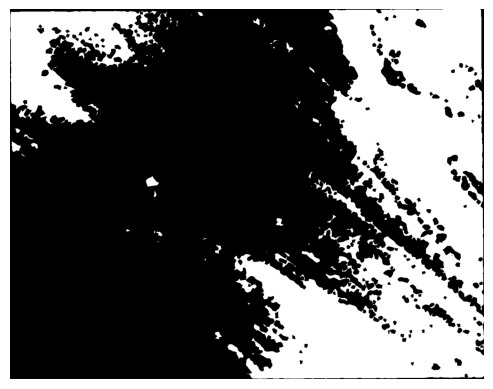

In [10]:
image = tiff.imread('images/rawraster3.tif')

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [11]:
with rasterio.open('images/rawraster3.tif') as dataset:
    elevation = dataset.read(1)

In [12]:
import matplotlib.pyplot as plt

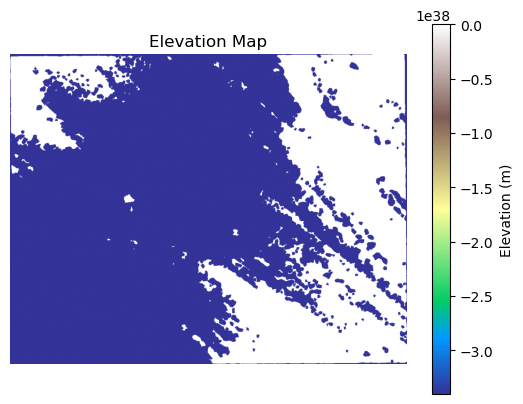

In [13]:
# Now 'elevation' is a 2D NumPy array containing the elevation values
plt.imshow(elevation, cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.title('Elevation Map')
plt.axis('off')
plt.show()

In [14]:
threshold = 100
mask = elevation > threshold

In [15]:
from rasterio import features

In [16]:
with rasterio.open('images/rawraster3.tif') as src:
    elevation = src.read(1)
    transform = src.transform
    crs = src.crs

In [17]:
shapes = features.shapes(mask.astype('uint8'), transform=transform)

In [18]:
shapes = features.shapes(mask.astype('uint8'), transform=transform)

In [19]:
geoms = []
for geom, value in shapes:
    if value == 1:  # only keep areas above threshold
        geoms.append(shape(geom))

gdf = gpd.GeoDataFrame(geometry=geoms, crs=crs)

In [20]:
gdf.to_file('above100m.geojson', driver='GeoJSON')

print("GeoJSON saved as above100m.geojson")

GeoJSON saved as above100m.geojson


In [21]:
    # Read the shapefile using geopandas
    gdf = gpd.read_file('tileindex_USACE_CA_Topobathy_DEM_2015.shp')

In [26]:
    # Convert the geodataframe to a GeoJSON file
    gdf.to_file('output_geojson_path', driver='GeoJSON')

In [10]:
allow_pickle=True

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)



A Slope calculation (rise/run)
C Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

t Wall-time = 0.0119528====================== ] (99% - 0.0s - 1 threads)


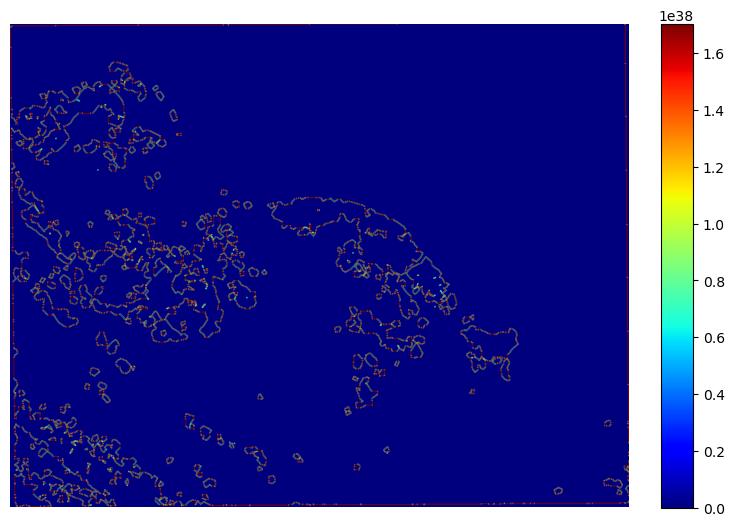

{'vmin': np.float64(0.0), 'vmax': np.float64(1.7014117331926443e+38)}

In [16]:
import rasterio
import richdem as rd

# Open the .tif raster and read the elevation data
with rasterio.open('images/rawraster4.tif') as src:
    elevation = src.read(1)  # read the first band

# Convert it to a richdem object
beau = rd.rdarray(elevation, no_data=-9999)

# Calculate slope
slope = rd.TerrainAttribute(beau, attrib='slope_riserun')

# Plot
rd.rdShow(slope, axes=False, cmap='jet', figsize=(8, 5.5))

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)



A Slope calculation (rise/run)
C Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

t Wall-time = 0.0127036====================== ] (99% - 0.0s - 1 threads)


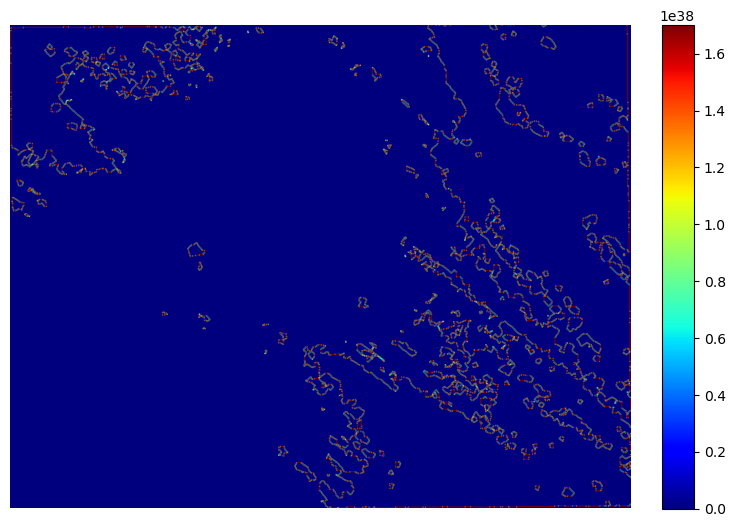

{'vmin': np.float64(0.0), 'vmax': np.float64(1.7014117331926443e+38)}

In [17]:
# Open the .tif raster and read the elevation data
with rasterio.open('images/rawraster3.tif') as src:
    elevation = src.read(1)  # read the first band

# Convert it to a richdem object
beau = rd.rdarray(elevation, no_data=-9999)

# Calculate slope
slope = rd.TerrainAttribute(beau, attrib='slope_riserun')

# Plot
rd.rdShow(slope, axes=False, cmap='jet', figsize=(8, 5.5))